<a href="https://colab.research.google.com/github/GeovaniOrt/Redes-Neuronales/blob/main/Red_Convolucional/Clasificaci%C3%B3n_de_Ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Redes Neuronales

## Redes Convolucionales (CNN)

### Clasificación de ropa

#### Preparación de datos

""" Importamos todas las librerias que usaremos """

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #Metricas
import seaborn as sns
import matplotlib.pyplot as plt

#### Cargar el conjunto de datos Fashion MNIST

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
"""
Brinda información sobre el dataset
"""
fashion_mnist.load_data

<function keras.src.datasets.fashion_mnist.load_data()>

In [ ]:
"""
Definimos una lista que donde el indice representa el nombre de la etiqueta
"""
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Procesamiento de datos

In [ ]:
### En este dataset, ya viene definidos los conjuntos de entrenamiento y de prueba
## NO es necesario clasificar x_test y x_train
 (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### Visualización de una imagen

In [ ]:
index = 873 #Muestra/cambia la imagén

In [ ]:
"""
Obtener la imagen de la prenda y su etiqueta
"""
image = train_images[index]
label = train_labels[index]

In [ ]:
"""
Imprimimos la representación matricial (numérica) de la imagen
"""
print(image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  59 101  67  93
  137 135 105 140 156 132  89  93  19   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0 179 254 252 255
  255 255 255 255 255 255 247 255  99   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 140 240 231 233
  227 225 233 231 235 238 232 253  50   0]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0   0 228 242 240 238
  240 237 236 240 240 242 239 250  33   0]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0  29 255 23

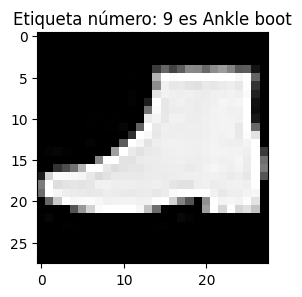

In [ ]:
"""
Mostramos la imagen con Matplotlib
"""
plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.grey)
plt.title(f'Etiqueta número: {label} es {class_names[label]}')
plt.show()

#### Procesamiento de datos

In [ ]:
"""
Muestra la longitud del conjunto de entrenamiento y de test de imágenes
"""
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
"""
Normalizar las imágenes para normalizar los valores de píxeles
"""
# Normalizar las imágenes para que los valores estén en el rango [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

#### Red neuronal convolucional

##### Compilar el modelo

In [ ]:
# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
"""
Crear un optimizador Adam con una tasa de aprendizaje del 0.001
"""
# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [ ]:
model.compile(optimizer=adam_optimizer,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

""" Entrenar el modelo """

In [ ]:
model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9529 - loss: 0.1270 - val_accuracy: 0.9126 - val_loss: 0.2750
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9554 - loss: 0.1171 - val_accuracy: 0.9058 - val_loss: 0.3069
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9599 - loss: 0.1052 - val_accuracy: 0.9074 - val_loss: 0.3194
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9630 - loss: 0.0973 - val_accuracy: 0.9057 - val_loss: 0.3481
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9643 - loss: 0.0950 - val_accuracy: 0.9091 - val_loss: 0.3198
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9677 - loss: 0.0853 - val_accuracy: 0.9103 - val_loss: 0.3510
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9705 - loss: 0.0806 - val_accuracy: 0.9089 - val_loss: 0.3749
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9723 - loss: 0.0725 -

#### Evaluación

In [ ]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9061 - loss: 0.5869


#### Predicciones

In [ ]:
probability_model = Sequential([model, Softmax()])
predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


#### Matriz de confusión

In [ ]:
# Calcular matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

##### Visualizar la matriz de confusión y mostrar la sensibilidad para cada clase

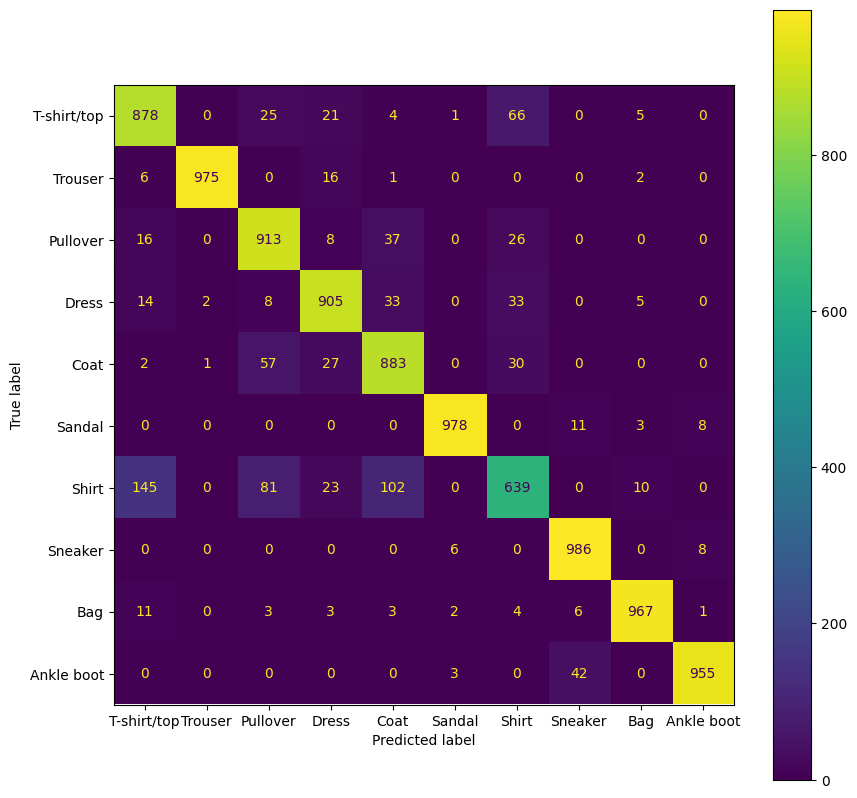

In [ ]:
# Graficar matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()

### Bonus

""" Graficar una imagen con su etiqueta predicha """

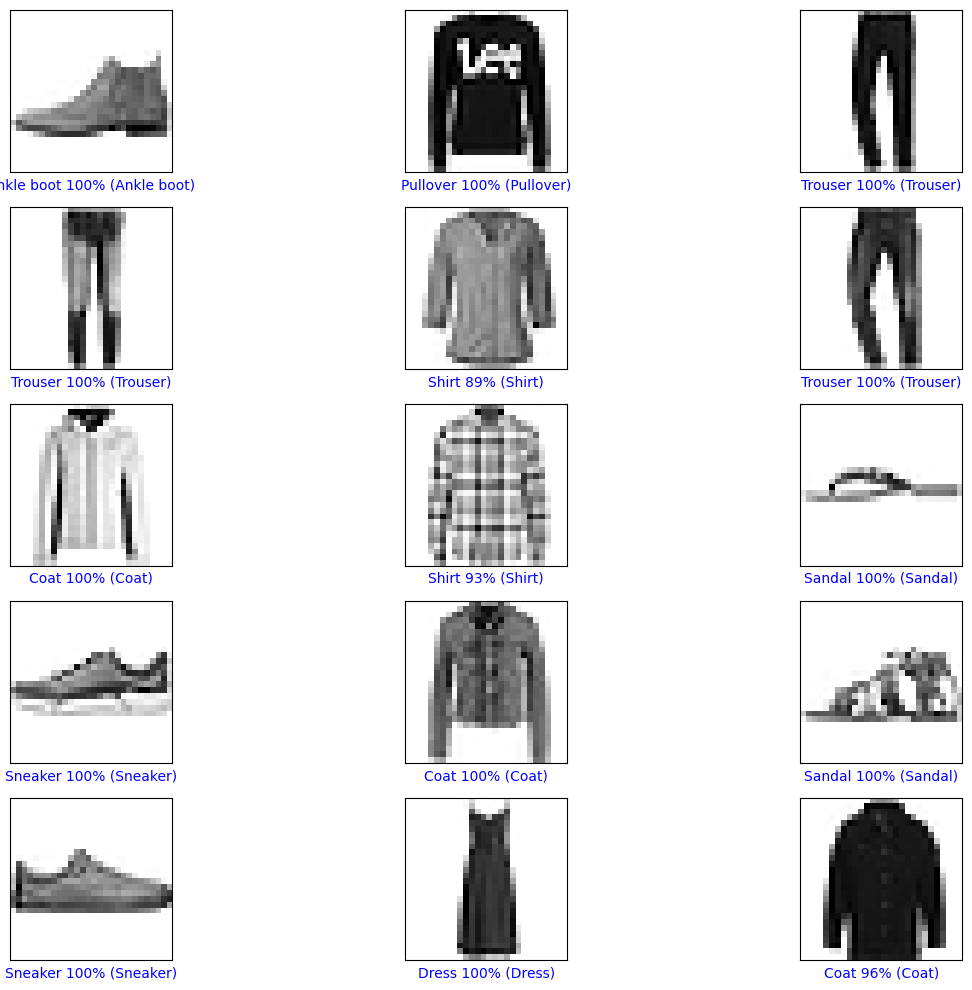

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary)

    predicted_label = tf.argmax(predictions_array).numpy()
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*tf.reduce_max(predictions_array).numpy(),
                                         class_names[true_label]),
                                         color=color)

# Graficar algunas predicciones
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)

plt.tight_layout()
plt.show()